# Initialisation

In [1]:
# Import libraries and dependencies
import ccxt
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import talib as ta

from Utility_Functions import Functions

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'str'>
Kraken secren data type: <class 'str'>


### Set Public and private keys and initialise the CCXT Exchange object

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

if not exchange.has['fetchOHLCV']:
    print('Cant load history data with this exchange. Try with a different exchange')

# Fetching the price data

In [4]:
currs_list = ['ETH/AUD', 'XRP/AUD' , 'LTC/AUD', 'ADA/AUD', 'XLM/AUD', 'BCH/AUD']     #

dict_ohlcv = {}

for curr in currs_list:
    
    # Call data fetch
    ohlcv = exchange.fetchOHLCV(curr, '1h')

    # Store the values in a dataframe
    df_ohlcv = pd.DataFrame(ohlcv, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']).set_index('Date')
    df_ohlcv.index = pd.to_datetime(df_ohlcv.index, unit='ms')

    df_ohlcv.dropna(inplace=True)

    # Store the symbol name and history data in a dict 
    dict_ohlcv[curr] = df_ohlcv 

    start_date = df_ohlcv.index[0].date().isoformat()
    end_date = df_ohlcv.index[-1].date().isoformat()
    num_records = (len(df_ohlcv))
    start_price = df_ohlcv.iloc[0]['Close']
    end_price = df_ohlcv.iloc[-1]['Close']

    print(f'Data summary for {curr}')
    print(f'    Start Date: {start_date}; End Date: {end_date}; NUmber of records: {num_records}')
    print(f'    Start Price: {start_price}; End Price: {end_price}')    
    print(f'Data for {curr} fetched and appended into the dictionary\n')

Data summary for ETH/AUD
    Start Date: 2021-07-27; End Date: 2021-08-26; NUmber of records: 720
    Start Price: 3098.06; End Price: 4266.8
Data for ETH/AUD fetched and appended into the dictionary

Data summary for XRP/AUD
    Start Date: 2021-07-27; End Date: 2021-08-26; NUmber of records: 720
    Start Price: 0.83652; End Price: 1.5403
Data for XRP/AUD fetched and appended into the dictionary

Data summary for LTC/AUD
    Start Date: 2021-07-27; End Date: 2021-08-26; NUmber of records: 720
    Start Price: 174.9; End Price: 235.17
Data for LTC/AUD fetched and appended into the dictionary

Data summary for ADA/AUD
    Start Date: 2021-07-27; End Date: 2021-08-26; NUmber of records: 720
    Start Price: 1.73042; End Price: 3.58925
Data for ADA/AUD fetched and appended into the dictionary

Data summary for XLM/AUD
    Start Date: 2021-07-27; End Date: 2021-08-26; NUmber of records: 720
    Start Price: 0.34612; End Price: 0.47115
Data for XLM/AUD fetched and appended into the diction

# Computing and adding Technical Indicators to the price data

In [5]:
fast_window = 5
slow_window = 15

df_all_data = pd.DataFrame() 
for curr, data in dict_ohlcv.items():

    df = Functions.add_tech_indicators(data, fast_window, slow_window)
    
    df['Currency'] = curr 
    df['Returns'] = df['Close'].pct_change()

    df.dropna(inplace=True)    
    df_all_data = df_all_data.append(df)

df_all_data.shape

(4225, 16)

In [6]:
df_all_data

,Open,High,Low,Close,Volume,SMA_agg,RSI_ratio,CCI,MACD_ratio,ADX,ADX_dirn,ATR_ratio,BBands_high,BBands_low,Currency,Returns
Date,,,,,,,,,,,,,,,,
2021-07-28 02:00:00,3136.77,3190.84,3131.56,3145.08,7.991239,1.009907,1.234023,158.656349,-1.145074,37.210854,1.0,1.174444,0.999321,1.012981,ETH/AUD,0.013097
2021-07-28 03:00:00,3117.26,3143.68,3103.80,3143.68,0.678257,1.010234,1.222300,29.689609,-68.521925,34.568352,1.0,1.143174,1.000394,1.012479,ETH/AUD,-0.000445
2021-07-28 04:00:00,3117.13,3123.64,3112.42,3123.64,4.501504,1.009877,1.045509,-12.249168,3.098269,32.454350,1.0,1.086202,1.006007,1.006521,ETH/AUD,-0.006375
2021-07-28 05:00:00,3116.63,3135.96,3113.27,3126.49,2.701707,1.011013,1.065247,-7.242703,1.783794,32.597457,1.0,1.012396,1.005466,1.004093,ETH/AUD,0.000912
2021-07-28 06:00:00,3120.57,3120.57,3065.51,3075.14,11.008443,1.009703,0.712413,-151.049574,0.249041,29.271725,0.0,1.084665,1.023750,0.992802,ETH/AUD,-0.016424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26 06:00:00,858.32,862.10,858.32,862.02,2.923344,0.988954,0.641017,-67.745023,-2.008340,65.454668,0.0,1.384309,1.027086,1.002429,BCH/AUD,0.004311
2021-08-26 07:00:00,854.20,854.20,846.03,846.03,4.869079,0.981745,0.472843,-110.591257,-1.767265,70.535010,0.0,1.597161,1.036940,0.994396,BCH/AUD,-0.018549
2021-08-26 08:00:00,846.03,846.03,846.03,846.03,0.000000,0.975084,0.472843,-95.460321,-1.503571,74.599284,0.0,1.368995,1.021866,0.998432,BCH/AUD,0.000000


<AxesSubplot:xlabel='Date'>

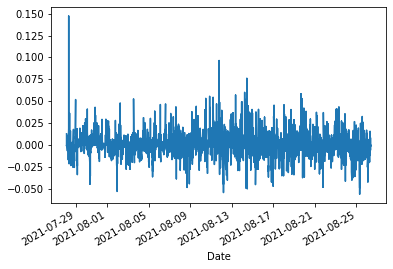

In [7]:
df_all_data.Returns.plot()

In [8]:
df_all_data.to_csv('Resources/Testing_data.csv')